In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

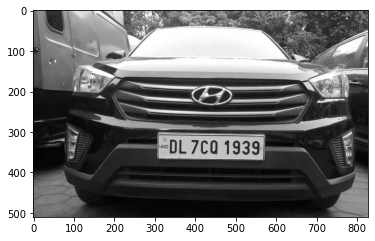

In [68]:
img = cv2.imread('2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

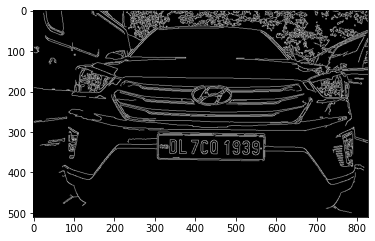

In [95]:
bfilter = cv2.bilateralFilter(gray, 11, 15, 20) #Noise reduction
edged = cv2.Canny(bfilter, 30,300) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [96]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
        

In [97]:
location

array([[[338, 319]],

       [[337, 352]],

       [[351, 352]],

       [[354, 323]]], dtype=int32)

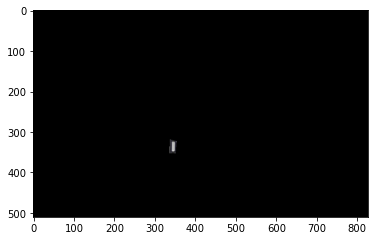

In [98]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

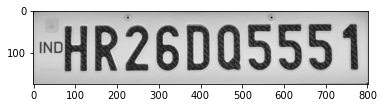

In [66]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [67]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[9, 65], [79, 65], [79, 109], [9, 109]], 'INDI', 0.6185151934623718),
 ([[58, 12], [798, 12], [798, 160], [58, 160]],
  'HR26DQ5551',
  0.7685690453530086)]

### method 2

In [108]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

n_plate_detector = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")

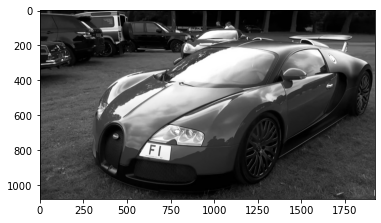

In [150]:
img = cv2.imread('10.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
detections = n_plate_detector.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=7)

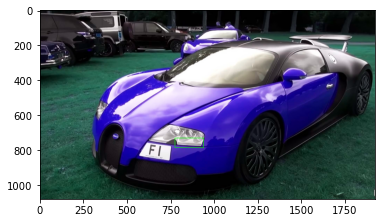

In [151]:
detections
for (x,y,w,h) in detections:
     cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(img)

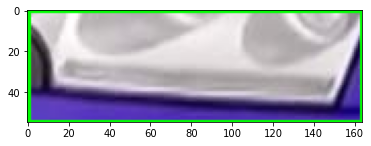

In [152]:
detcted = img[y:y + h, x:x + w]
plt.imshow(detcted)

In [137]:
reader = easyocr.Reader(['en'])
result = reader.readtext(detcted)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[17, 135], [89, 135], [89, 175], [17, 175]], 'INDI', 0.9151895046234131),
 ([[64, 75], [807, 75], [807, 232], [64, 232]],
  'HR26DQ5551',
  0.6489200313765541)]

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


MH 13429456


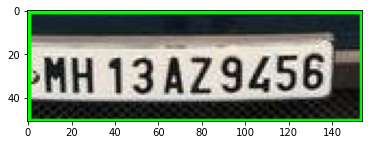

In [165]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

n_plate_detector = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")

img = cv2.imread('3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
detections = n_plate_detector.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=7)

for (x,y,w,h) in detections:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(img)

plate = img[y:y + h, x:x + w]
plt.imshow(plate)

reader = easyocr.Reader(['en'])
result = reader.readtext(plate)
for i in result:
    print(i[1].upper())

In [160]:
result[0][1].upper()

'NHO14V8866'

NHO14V8866
